---
title: "4.1-k-Means Clustering"
author: "Ahmed Aredah"
date: "11.19.2023"
output: html_document
editor: visual
categories:
    Clustering
---

## Overview

K-Means Clustering is a popular and versatile unsupervised learning algorithm used for grouping data into k distinct, non-overlapping subgroups (or clusters). Unlike supervised learning methods like k-NN, K-Means does not rely on labeled data. Its objective is to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

## Mathematical Description

K-Means clustering seeks to minimize the within-cluster variances, also known as squared Euclidean distances. The algorithm can be broken down into the following steps:

1. **Initialization**: K initial "means" (centroids) are randomly selected from the data points.

2. **Assignment Step**: Each observation is assigned to the nearest centroid, and clusters are formed.

3. **Update Step**: The centroid of each cluster is recalculated as the mean of all points assigned to that cluster.

4. **Iteration**: Steps 2 and 3 are repeated until the centroids no longer change significantly, indicating convergence.

The mathematical formulation of the objective is to minimize the sum of the squared distances between each data point and its corresponding cluster centroid:

\begin{equation}
\min_{\mathbf{S}} \sum_{i=1}^{k} \sum_{\mathbf{x} \in S_i} \|\mathbf{x} - \mathbf{\mu}_i\|^2
\end{equation}

where:

- \( \mathbf{\mu}_i \) is the mean of points in \( S_i \).
- \( S_i \) is the set of all points assigned to the ith cluster.

### Variants of K-Means

Several variants of the K-Means algorithm exist, such as K-Means++, which offers an improved method of centroid initialization, and Mini-Batch K-Means, which uses subsets of the data to speed up the convergence process.

## Application

To demonstrate the practical use of K-Means, we can apply it to the same dataset we used in the classification section; however, we will ignore the provided labels and perhaps use these labels for a comparison.


In [15]:
#import required libraries
import pandas as pd
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import mode


#inline plots
%matplotlib inline

# Set Seaborn style to "whitegrid" for a white background with grid lines
sns.set_style("whitegrid")

#supress warnings!
warnings.simplefilter(action='ignore', category=Warning)
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

print("required libraries loaded successfully!")

required libraries loaded successfully!


In [16]:
#| echo: false
# Set the background color to black and axis label color to white
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'white'

In [17]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert the data to a pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Means model
# Assuming we want to create k clusters where k is the number of unique classes in y
k = len(set(y))
kmeans = KMeans(n_clusters=k, random_state=42)

# Train the model on the training data
# Note that we don't use y_train as K-Means is unsupervised
kmeans.fit(X_train)

# Assign clusters to the test data
y_pred = kmeans.predict(X_test)

# Evaluate the clustering (Note: direct accuracy may not be meaningful for clustering)
# The accuracy here will most likely not be meaningful.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.12280701754385964


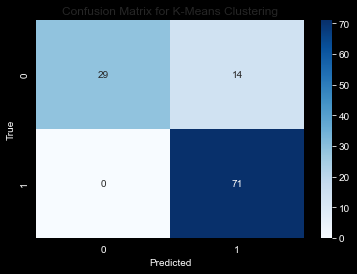

In [19]:
# Map cluster labels to original class labels (0, 1, etc.)
# This mapping is heuristic and may not be perfect
cluster_labels = np.zeros_like(y_pred)
for i in range(k):
    mask = (y_pred == i)
    cluster_labels[mask] = mode(y_test[mask])[0]

# Now plot the confusion matrix
cm = confusion_matrix(y_test, cluster_labels)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

below is the output of the KNN classification algorithm for comparison!

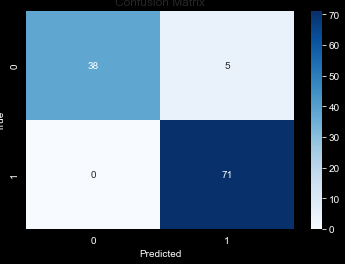

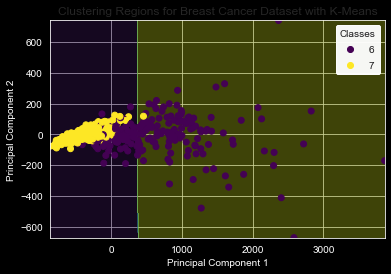

In [20]:
# Reduce the dimensionality of the dataset to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the K-Means model with the number of clusters equal to the number of unique classes
k = len(set(y))
kmeans = KMeans(n_clusters=k, random_state=42)

# Train the K-Means model on the training data
kmeans.fit(X_train)

# Create a meshgrid for the plot
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

# Get the cluster assignments for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustering regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the data points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y+6, cmap='viridis')

# Add a legend
legend = plt.legend(*scatter.legend_elements(), title='Classes')
plt.gca().add_artist(legend)

# Show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Regions for Breast Cancer Dataset with K-Means')
plt.show()

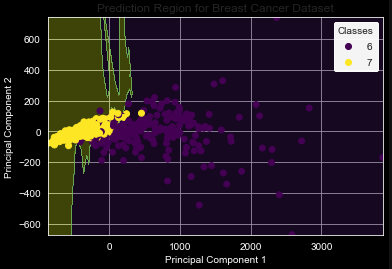